# Zero Modes

These examples illustrate the conditions to get a zero-mode, its properties, and how to amplify it.

Throughout the examples, the A sublattice displays a positive imaginary onsite energy (amplification) and the sublattice B a negative imaginary onsite energy (absorption) such that $\bar{\epsilon}_a=-\bar{\epsilon}_b$.
The chain is composed of $n+1$ sites A and $n$ sites B and, starts and ends with an A site. The odd number of sites breaks the sublattice symmetry (one extra A site) resulting in the existence of a zero-mode fully polarized on the A sublattice, $\langle A|A \rangle=1$ and $\langle B|B \rangle=0$.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from chain_tb import *
%matplotlib inline

## Identical hoppings

In [14]:
n = 21
tags = [b'a', b'b']
ri = [[0, 0], [1, 0]]
pv = [[2, 0], [2, 0]]
figsize = (8, 3)
ta, tb = 2., 2.
onsite = [0.2j, -0.2j]

In [5]:
chain_tb = latticeTB(tags=tags, ri=ri, pv=pv)
chain_tb.get_lattice(nx=n, ny=1)
eig_chain = eigChain(chain_tb.coor, chain_tb.tags)
eig_chain.set_hop(ta)

In [7]:
eig_chain = eigChain(chain_tb.coor, chain_tb.tags)
eig_chain.set_hop(ta=ta)

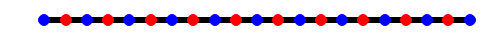

In [7]:
plot_chain = plotChain(chain_tb.coor, chain_tb.tags)
fig_lattice = plot_chain.plt_lattice(ms=12, hop=eig_chain.hop, c=3, 
                                     numero=False, figsize=figsize)

In [9]:
eig_chain.set_onsite(onsite)
eig_chain.get_ham()
eig_chain.get_eig()

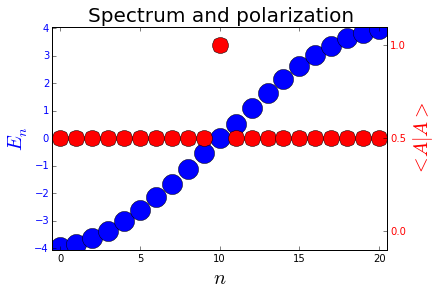

In [10]:
fig_spec = plot_chain.plt_spec(eig_chain.en, eig_chain.pola,
                               ms=20, pola_tag=b'a')

The spctrum reveals one state of zero energy only localized on the A sublattice.

State with polarization: [[ 1.]]


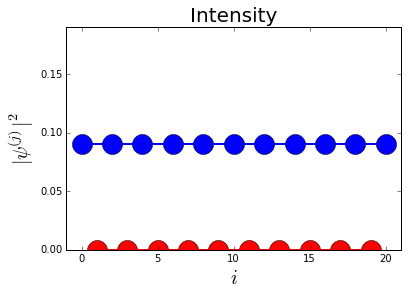

In [11]:
state_zero = eig_chain.get_state_pola('a')
fig_state = plot_chain.plt_intensity(state_zero)

The intensity of the zero mode is uniformly distributed on the A sites. 

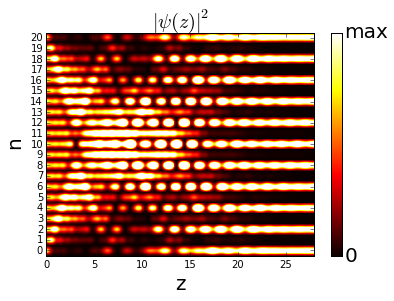

In [12]:
prop_chain = propagationTB(coor=chain_tb.coor, steps=1400, dz=0.04)
psi_init = np.ones(prop_chain.sites, 'c16')/np.sqrt(prop_chain.sites)
prop_chain.get_prop(ham=eig_chain.ham, psi_init=psi_init, norm=True)
fig_prop = prop_chain.plt_prop_chain()

If some absorption is added on the A sites, the zero mode can be amplified.

## Identical hoppings with an impurity

The impurity, located at the center of the chain, is modeled by considering two adjacent weak couplings. 

In [13]:
eig_chain = eigChain(chain_tb.coor, chain_tb.tags)
eig_chain.set_hop(ta=ta)

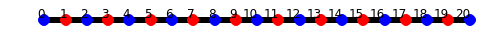

In [14]:
fig_lattice = plot_chain.plt_lattice(ms=12, hop=eig_chain.hop, c=3, fs=12,
                                     numero=True, figsize=figsize)

The hoppings between the 9th and 10th site and, between the 10th and 11th site are then modified.

In [24]:
eig_chain.set_hop(ta)
eig_chain.set_hop_def([[9, 10], [10, 11]], [1., 1.])

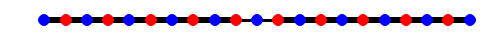

In [25]:
fig_lattice = plot_chain.plt_lattice(ms=12, hop=eig_chain.hop, c=3, fs=12,
                                     numero=False, figsize=figsize)

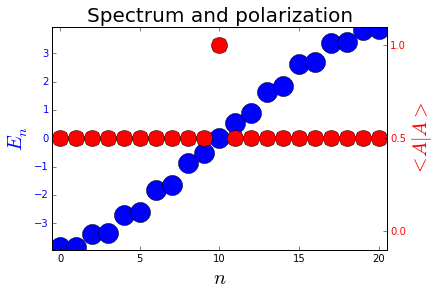

In [27]:
eig_chain.set_onsite(onsite)
eig_chain.get_ham()
eig_chain.get_eig()
fig_spec = plot_chain.plt_spec(eig_chain.en, eig_chain.pola,
                               ms=20, pola_tag=b'a')

State with polarization: [[ 1.]]


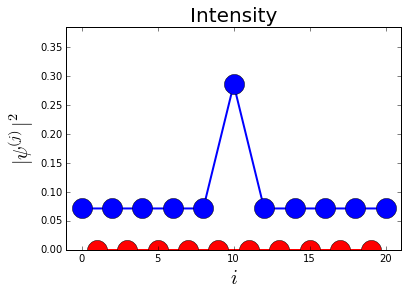

In [28]:
state_zero = eig_chain.get_state_pola('a')
fig_state = plot_chain.plt_intensity(state_zero)

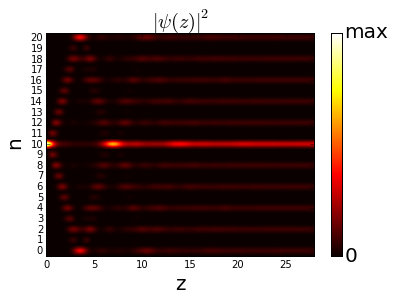

In [29]:
prop_chain = propagationTB(coor=chain_tb.coor, steps=1400, dz=0.04)
psi_init = np.zeros(prop_chain.sites, 'c16')
psi_init[n//2] = 1.
prop_chain.get_prop(ham=eig_chain.ham, psi_init=psi_init, norm=True)
fig_prop = prop_chain.plt_prop_chain()

## Alternating hoppings

In [31]:
ta, tb = 2., 1.

In [32]:
eig_chain.set_hop(ta, tb)
eig_chain.set_onsite(onsite)
eig_chain.get_ham()

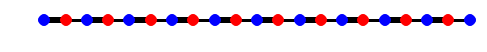

In [21]:
fig_lattice = plot_chain.plt_lattice(ms=12, hop=eig_chain.hop, c=3, fs=12,
                                     numero=False, figsize=figsize)

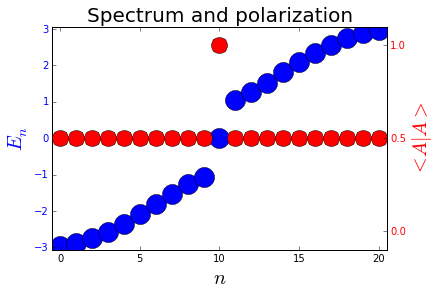

In [22]:
eig_chain.get_eig()
fig_spec = plot_chain.plt_spec(eig_chain.en, eig_chain.pola,
                               ms=20, pola_tag=b'a')

Note that the alternating hoppings introduce a gap. The zero mode is localized in the middle of the gap.

State with polarization: [[ 1.]]


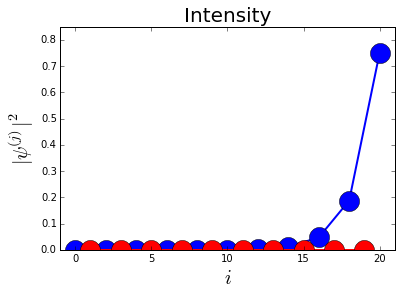

In [23]:
state_zero = eig_chain.get_state_pola('a')
fig_state = plot_chain.plt_intensity(state_zero)

The zero mode is now exponentially localized and located at the edge of the chain ending with a weak coupling. The zero-mode is known as a Shockley state.

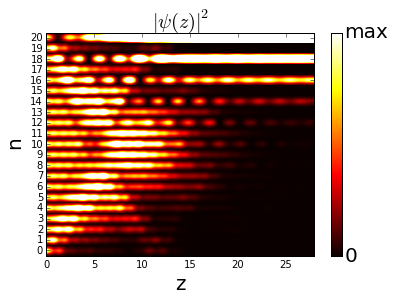

In [62]:
prop_chain = propagationTB(coor=chain_tb.coor, steps=1400, dz=0.04)
psi_init = np.ones(prop_chain.sites, 'c16')/np.sqrt(prop_chain.sites)
prop_chain.get_prop(ham=eig_chain.ham, psi_init=psi_init, norm=True)
fig_prop = prop_chain.plt_prop_chain()

## Alternating hoppings with a dimeriation defect

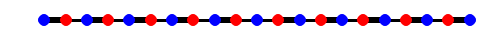

In [33]:
eig_chain.set_hop(ta, tb)
eig_chain.set_dim_defect(n//2)
fig_lattice = plot_chain.plt_lattice(ms=12, hop=eig_chain.hop, c=3, fs=12,
                                     numero=False, figsize=figsize)

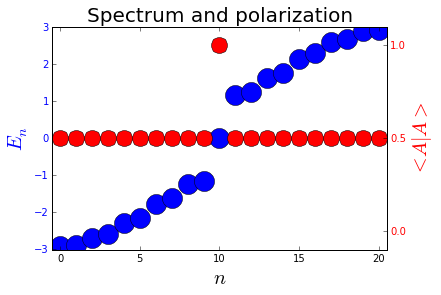

In [34]:
eig_chain.get_ham()
eig_chain.get_eig()
fig_spec = plot_chain.plt_spec(eig_chain.en, eig_chain.pola,
                               ms=20, pola_tag=b'a')

State with polarization: [[ 1.]]


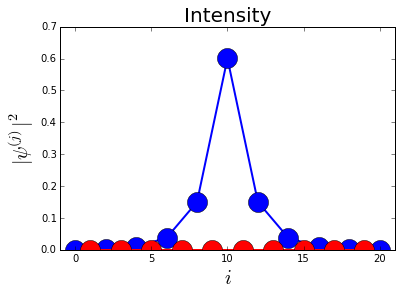

In [35]:
state_zero = eig_chain.get_state_pola('a')
fig_state = plot_chain.plt_intensity(state_zero)

The zero mode is exponentially localized and located at dimerization defect. The zero-mode is known as a SSH state.

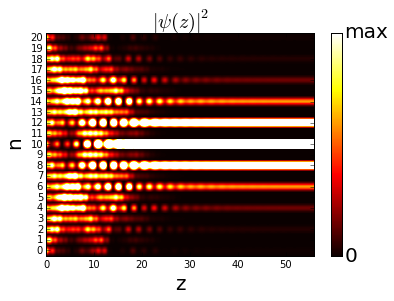

In [68]:
prop_chain = propagationTB(coor=chain_tb.coor, steps=1400, dz=0.04)
psi_init = np.ones(prop_chain.sites, 'c16')/np.sqrt(prop_chain.sites)
prop_chain.get_prop(ham=eig_chain.ham, psi_init=psi_init, norm=True)
fig_prop = prop_chain.plt_prop_chain()

### Disorder

In [41]:
eig_chain.disorder_generic(alpha=0.5)

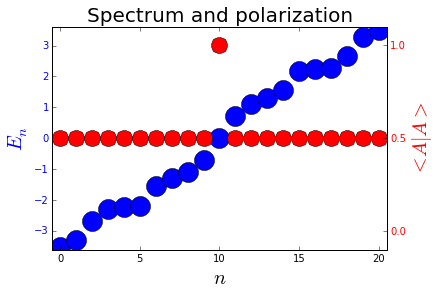

In [42]:
eig_chain.get_ham()
eig_chain.get_eig()
fig_spec = plot_chain.plt_spec(eig_chain.en, eig_chain.pola,
                               ms=20, pola_tag=b'a')

State with polarization: [[ 1.]]


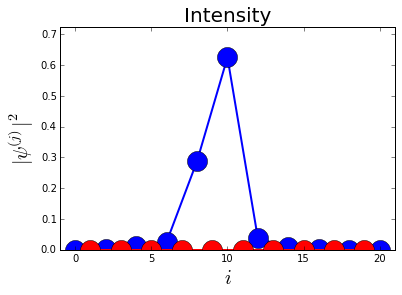

In [43]:
state_zero = eig_chain.get_state_pola('a')
fig_state = plot_chain.plt_intensity(state_zero)

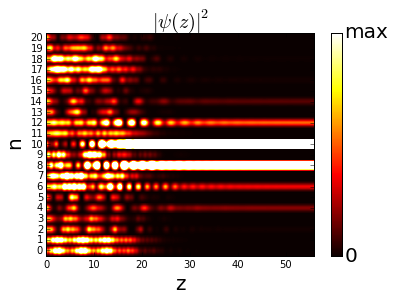

In [44]:
prop_chain = propagationTB(coor=chain_tb.coor, steps=1400, dz=0.04)
psi_init = np.ones(prop_chain.sites, 'c16')/np.sqrt(prop_chain.sites)
prop_chain.get_prop(ham=eig_chain.ham, psi_init=psi_init, norm=True)
fig_prop = prop_chain.plt_prop_chain()

The zero-mode is insensitive with respect disorder and in the gap i.e. the zero-mode is topologically protected. The robstness to disorder has been first discover by Jackiw and Rebbin in field theory (1565) and few years later by Su, Schrieffer, and Heeger in condensed-matter (1969).

Note: 

1- Schrieffer  won the Nobel Prize in Physics 1972 for the development of the theory of superconductivity (Prize shared with Bardeen and Cooper ie the famous BCS-theory). 
http://www.nobelprize.org/nobel_prizes/physics/laureates/1972/

2- Heeger won the Nobel Prize in Chemistry 2000 for the discovery and development of conductive polymers (Prize shared with MacDiarmid and Shirakawa). http://www.nobelprize.org/nobel_prizes/chemistry/laureates/2000/

## Adiabatic pumping

In [73]:
eig_chain = eigChain(chain_tb.coor, chain_tb.tags)
eig_chain.set_hop(ta=ta, tb=tb)
eig_chain.set_onsite(onsite)
eig_chain.set_dim_defect(4)
eig_chain.get_ham()
H1 = np.copy(eig_chain.ham)

In [74]:
eig_chain.set_hop(ta=ta, tb=tb)
eig_chain.set_onsite(onsite)
eig_chain.set_dim_defect(16)
eig_chain.get_ham()
H2 = np.copy(eig_chain.ham)

In [75]:
eig_chain.set_hop(ta=ta, tb=tb)
eig_chain.set_onsite(onsite)
eig_chain.set_dim_defect(10)
eig_chain.get_ham()
H3 = np.copy(eig_chain.ham)

In [106]:
prop_chain = propagationTB(coor=chain_tb.coor, steps=2000, dz=0.08)
psi_init = np.zeros(n)
psi_init[4] = 1.
prop_chain.get_pump(hams=np.array([H1, H2, H3]), psi_init=psi_init, norm=True)

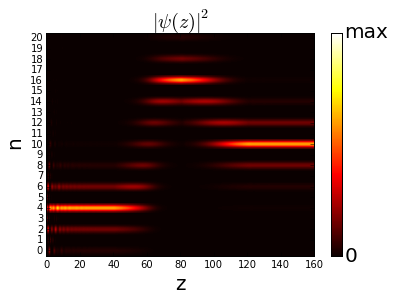

In [107]:
fig_prop = prop_chain.plt_prop_chain()

A smooth deformation of the hoppings configuration preserves the zero-mode which follows the dimerization defect line.

## Charge fractionalization

In [4]:
n = 21
tags = [b'a', b'b']
ri = [[0, 0], [1, 0]]
pv = [[2, 0], [2, 0]]
figsize = (8, 3)
onsite = [0.2j, -0.2j]
ta, tb = 2., 1.

In [5]:
chain_tb = latticeTB(tags=tags, ri=ri, pv=pv)
chain_tb.get_lattice(nx=n, ny=1)

In [6]:
eig_chain = eigChain(chain_tb.coor, chain_tb.tags)
eig_chain.set_hop(ta, tb)
eig_chain.set_dim_defect(n//2)
eig_chain.set_onsite(onsite)
eig_chain.get_ham()
eig_chain.get_eig()

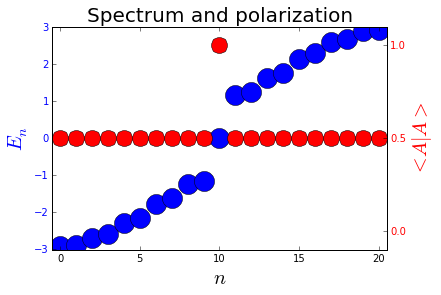

In [8]:
plot_chain = plotChain(chain_tb.coor, chain_tb.tags)
fig_spec = plot_chain.plt_spec(eig_chain.en, eig_chain.pola,
                               ms=20, pola_tag=b'a')

Get 1 state(s) between -0.01 and 0.01:
A sublattice polarization  1.0
B sublattice polarization  4.24578381019e-31


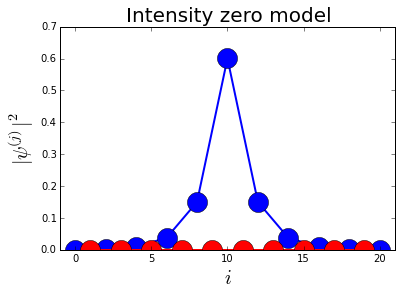

In [9]:
zero_mode = eig_chain.get_states_en(e_min=-0.01, e_max=0.01)
fig_state = plot_chain.plt_intensity(zero_mode, add='zero model')

Get 10 state(s) between -4 and -0.01:
A sublattice polarization  5.0
B sublattice polarization  5.0
0.454545454545 0.5


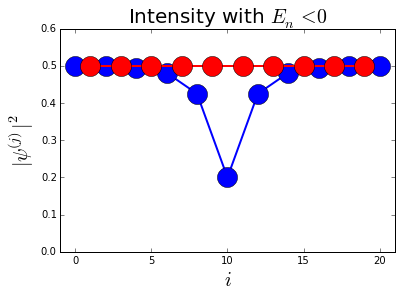

In [11]:
states = eig_chain.get_states_en(e_min=-4, e_max=-0.01)
fig_state = plot_chain.plt_intensity(states, add='with $E_n<0$')
print(states[0::2].sum()/11, states[1::2].sum()/10)

Get 11 state(s) between -4 and 0.01:
A sublattice polarization  6.0
B sublattice polarization  5.0
0.545454545455 0.5


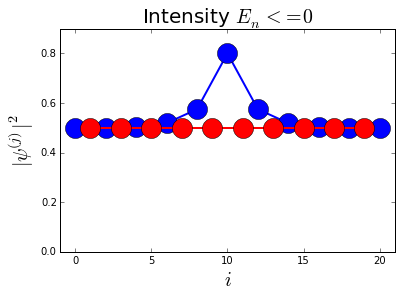

In [12]:
states = eig_chain.get_states_en(e_min=-4, e_max=0.01)
fig_state = plot_chain.plt_intensity(states, add='$E_n<=0$')
print(states[0::2].sum()/11, states[1::2].sum()/10)

Get 10 state(s) between 0.01 and 4:
A sublattice polarization  5.0
B sublattice polarization  5.0
0.454545454545 0.5
[ 0.5   0.5   0.5   0.5   0.5   0.5   0.48  0.5   0.42  0.5   0.2   0.5
  0.42  0.5   0.48  0.5   0.5   0.5   0.5   0.5   0.5 ]


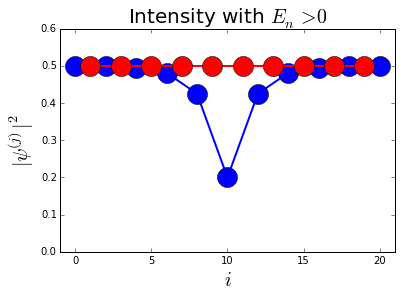

In [13]:
states = eig_chain.get_states_en(e_min=0.01, e_max=4)
fig_state = plot_chain.plt_intensity(states, add='with $E_n>0$')
print(states[0::2].sum()/11, states[1::2].sum()/10)
print(states)